# LetsGrowMore Virtual Internship Program (LGMVIP) [Sept.2021 - Oct. 2021]

# Task 3 : Exploratory Data Analysis on Dataset - Terrorism

# Author: Pritish Rajpoot

### Level: Intermediate

As a security/defense analyst, I need to find out the hot zone of terrorism. In this task, we will do Exploratory Data Analysis on terrorism dataset and find some insightful information out of the dataset.

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Setting juypyter notebook to show a maximum of 5000 rows in output for each cell
pd.options.display.max_rows = 5000

In [4]:
#Jupyter Notebook will ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [6]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

### Looking at First 5 and Last 5 Rows of the Dataset

In [7]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Getting the Size of the Dataset

In [9]:
col = data.columns.tolist()
print(col)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

### Renaming Certain Columns

In [10]:
df = pd.DataFrame(data,data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [11]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Creating a new column

 Here, a new column is added called Total_casualities which represents number of the people harmed (killed + injured) in terrorist attacks.

In [14]:
df['Total_casualities'] = df['Killed'] + df['Wounded']

### Extracting important columns

In [15]:
df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Total_casualities','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success']]

In [16]:
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,...,Killed,Wounded,Total_casualities,Target,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,1.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,0.0,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,1.0,0.0,1.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [17]:
col = df.columns.tolist()
print(col)

['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed', 'Wounded', 'Total_casualities', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'Success']


### Checking for Null Values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Extended           181691 non-null  int64  
 3   Day                181691 non-null  int64  
 4   Country            181691 non-null  object 
 5   State              181270 non-null  object 
 6   Region             181691 non-null  object 
 7   City               181257 non-null  object 
 8   Latitude           177135 non-null  float64
 9   Longitude          177134 non-null  float64
 10  Location           55495 non-null   object 
 11  AttackType         181691 non-null  object 
 12  Killed             171378 non-null  float64
 13  Wounded            165380 non-null  float64
 14  Total_casualities  164817 non-null  float64
 15  Target             181055 non-null  object 
 16  Su

In [19]:
df.isnull().sum()

Year                      0
Month                     0
Extended                  0
Day                       0
Country                   0
State                   421
Region                    0
City                    434
Latitude               4556
Longitude              4557
Location             126196
AttackType                0
Killed                10313
Wounded               16311
Total_casualities     16874
Target                  636
Summary               66129
Group                     0
Target_type               0
Weapon_type               0
Motive               131130
Success                   0
dtype: int64

 Here, we see some null values present in the dataset. But, they are not needed to be handled at this point.

### Exploratory Data Analysis and Data Visualization


### Heatmap for Correlation among features

In [23]:
corr  =  df.corr()

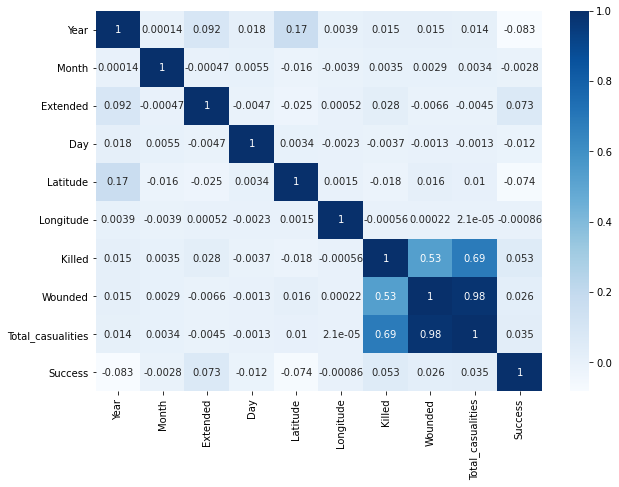

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'Blues')
plt.show()

### Number of Terrorists Activities vs Year

In [25]:
count =  df['Year'].value_counts()
year = count.index.sort_values(ascending  = True)
val = []
for i in year:
    val.append(count[i])

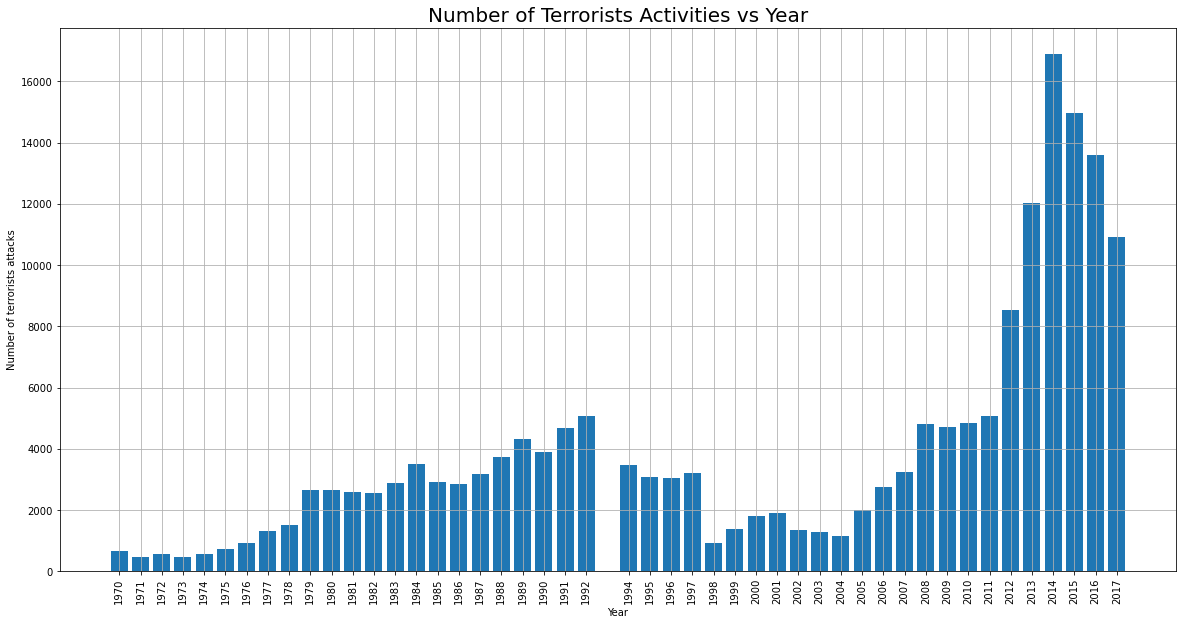

In [26]:
plt.figure(figsize = (20,10))
plt.bar(year, val, tick_label = year )
plt.xticks(rotation  = 90)
plt.title('Number of Terrorists Activities vs Year', fontsize=20)  
plt.xlabel('Year')
plt.ylabel('Number of terrorists attacks')
plt.grid(True)
plt.show()

### Conclusion:

Generally, as the Time proceeds the Number of Terrorists Attacks also Increased.

The peak in terms of Number of Terrorists Attacks was observed in 2014.

A Decline in terms of Number of Terrorists Attacks has been observed since 2014 which shows the progress towards the mission of reducing such terrorists attacks.

### Total Casualties vs Year

In [27]:
year_cas  = df.groupby(by = df['Year']).Total_casualities.sum().to_frame().reset_index()

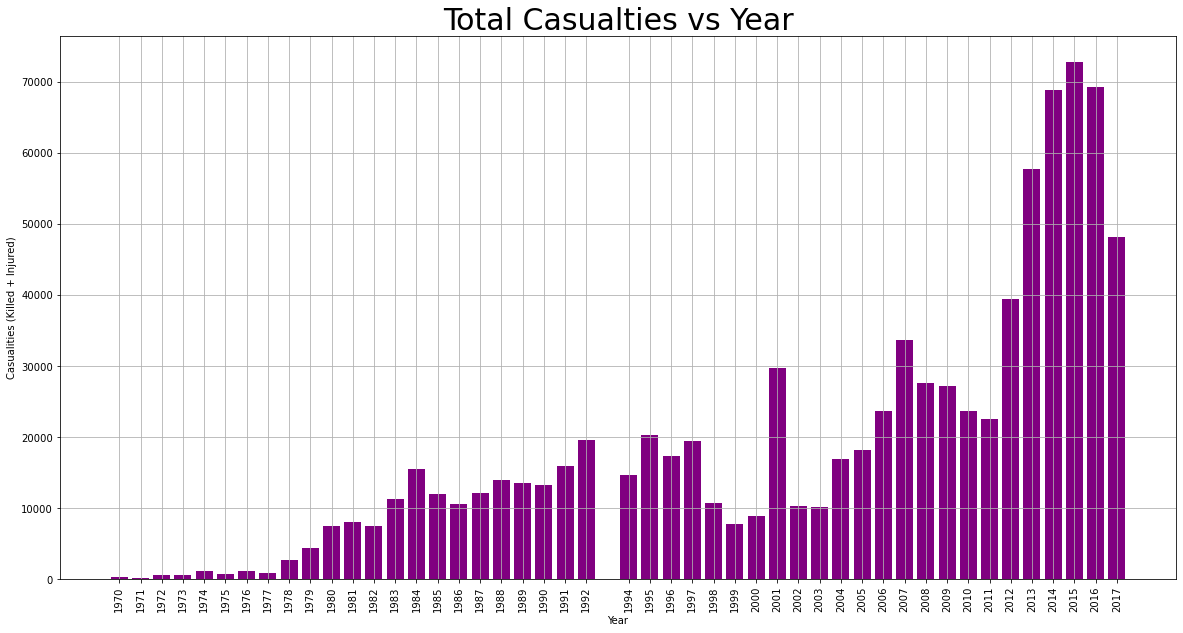

In [28]:
plt.figure(figsize = (20,10))
plt.bar(year_cas['Year'],year_cas['Total_casualities'], tick_label = year_cas['Year'], color =  'purple')
plt.xticks(rotation  = 90)
plt.title('Total Casualties vs Year', fontsize=30)  
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Casualities (Killed + Injured)')
plt.show()


### Conclusion:

Generally, as the Time proceeds the Number of People Harmed (Killed or Injured) also Increased Significantly.

The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.

Though there has been a decline in the Number of People Harmed after 2015 but these numbers are still very large and need to be reduced as soon as possible.

### Bar Plot for Countries affected by Terrorist Attacks

In [29]:
country = df['Country'].value_counts().index.tolist()

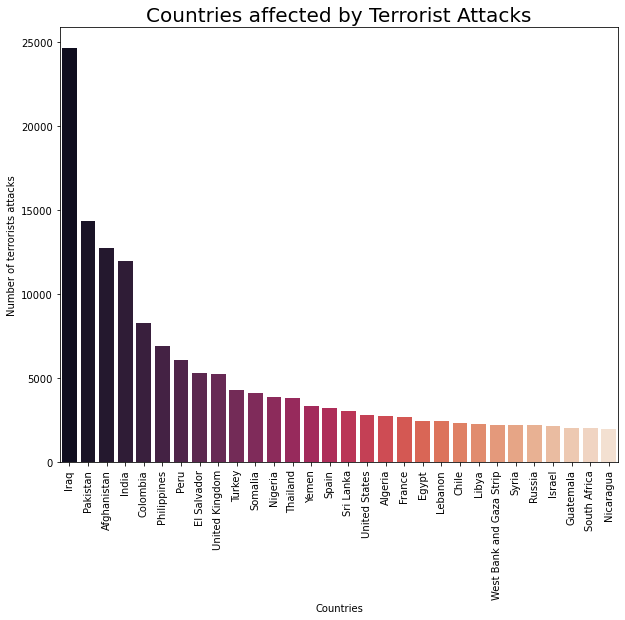

In [30]:
fig = plt.figure(figsize=(10,8))
sns.barplot(df['Country'].value_counts()[0:30].index, df['Country'].value_counts()[0:30].values,palette='rocket',  tick_label = country[0:30])
plt.xticks(rotation = 90)
plt.title('Countries affected by Terrorist Attacks', fontsize =  20)
plt.xlabel('Countries')
plt.ylabel('Number of terrorists attacks')
plt.show()

### Conclusion:

The above image shows the Top 30 countries in terms of most number of terrorist attacks.

The top country which is most affected by terrorist attacks is Iraq.

The top 5 countries most affected by terrorist attacks are Iraq, Pakistan, Afganistan, India, and Colombia.

### Number of Total Casualities in Each Country

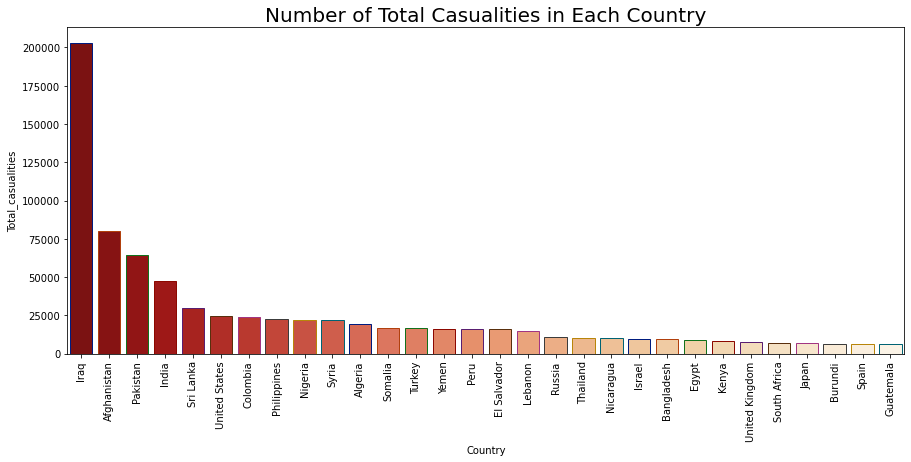

In [31]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').Total_casualities.sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)[:30]
sns.barplot(x=count_cas.Country, y=count_cas.Total_casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each Country', fontsize  = 20)
plt.show()

### Conclusion:
The above image shows the Most Number of Total Casualities in Each Country.

The most affected country by Total Casualities is Iraq with 200K+ Casualities.

The top 5 countries most affected by terrorist attacks in terms of casualities are Iraq, Afganistan, Pakistan, India, Sri Lanka.

### Most Affected States by Terrorist Attacks

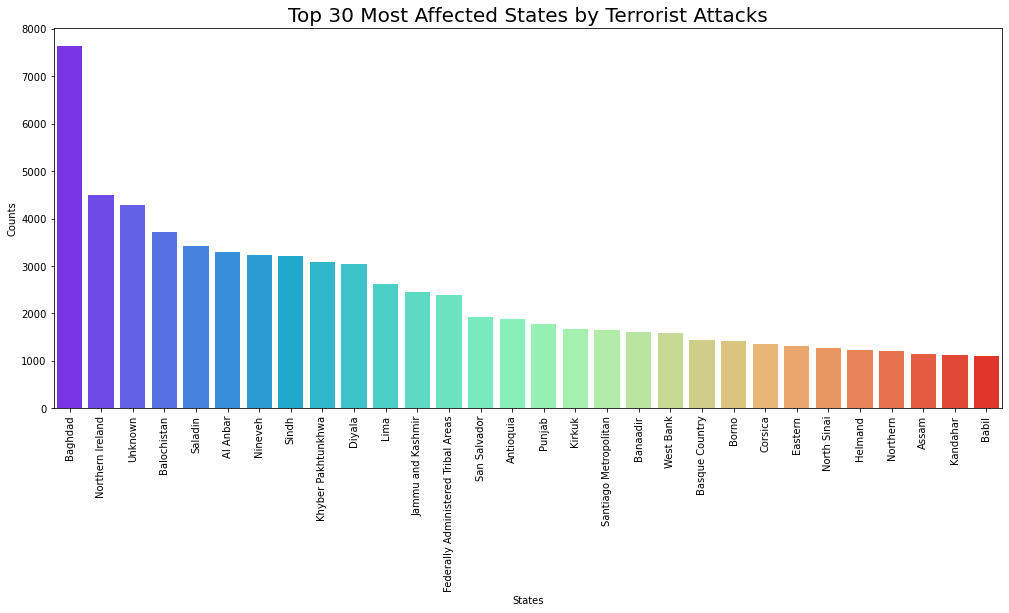

In [32]:
fig = plt.figure(figsize=(17,7))
sns.barplot(df['State'].value_counts()[0:30].index,df['State'].value_counts()[0:30].values,palette='rainbow')
plt.title('Top 30 Most Affected States by Terrorist Attacks', fontsize =  20)
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

### Conclusion:
The above image shows the Top 30 states in terms of most number of terrorist attacks.

The most affected state by terrorist attacks is Baghdadm with 7500+ Terrorist Attacks.

The top 5 states most affected by terrorist attacks are Baghdadm, Northern Ireland, Balochistan, Saladin, Al Anbar.

### Most Affected Regions by Terrorist Attacks

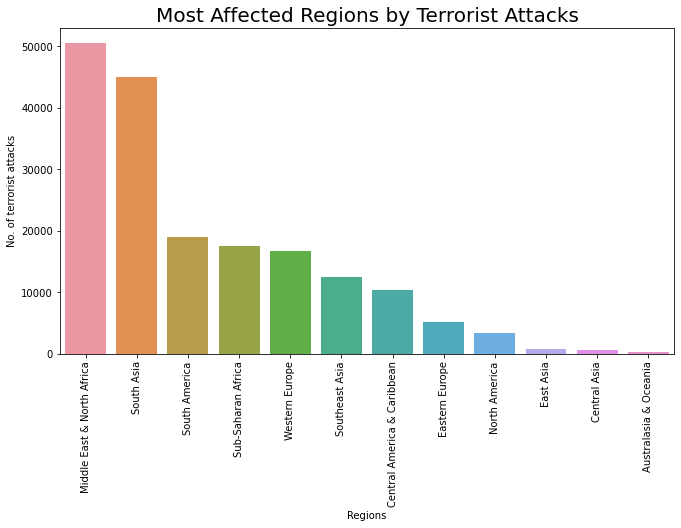

In [33]:
fig = plt.figure(figsize=(11,6))
sns.barplot(df['Region'].value_counts().index,df['Region'].value_counts().values, tick_label = df['Region'].value_counts()[0:30].index)
plt.title('Most Affected Regions by Terrorist Attacks', fontsize =20)
plt.xlabel('Regions')
plt.ylabel('No. of terrorist attacks')
plt.xticks(rotation=90);

### Conclusion:
The above image shows the top regions in terms of most number of terrorist attacks.

The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.

The top 5 regions most affected by terrorist attacks are Middle East & North Africa, South Asia, South America, Sub-Saharan Africa, Western Europe.

### Groups with Most Number of Terrorist Attacks

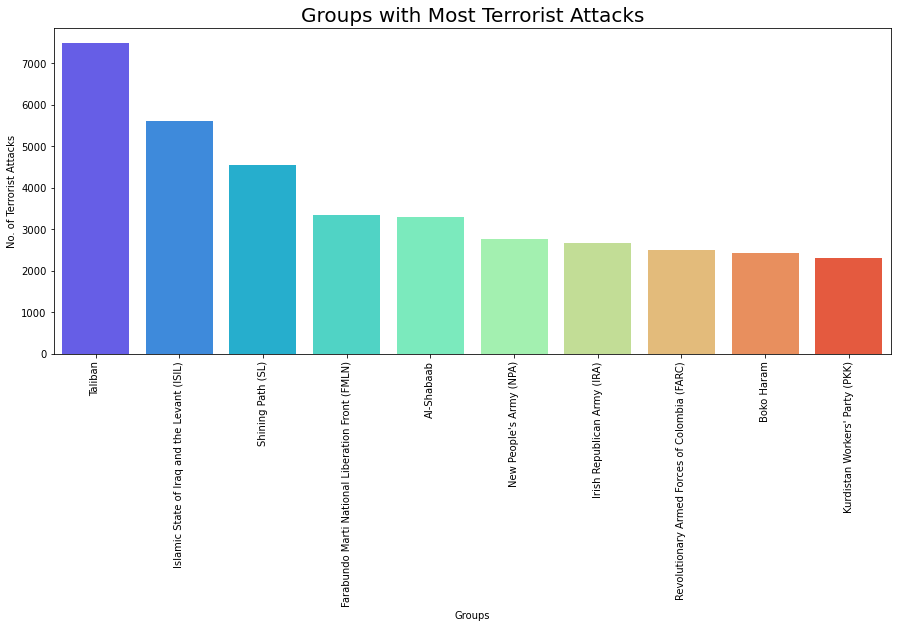

In [34]:
fig = plt.figure(figsize=(15,6))
sns.barplot(df['Group'].value_counts()[1:11].index,df['Group'].value_counts()[1:11].values,palette='rainbow')
plt.title('Groups with Most Terrorist Attacks', fontsize  = 20)
plt.xlabel('Groups')
plt.ylabel('No. of Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

### Conclusion:
The above image shows the top Groups with Most No. of Terrorist Attacks.

The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.

The top 5 Groups with Most No. of Terrorist Attacks are 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab'.

### Most Used Attack Types by Terrorists

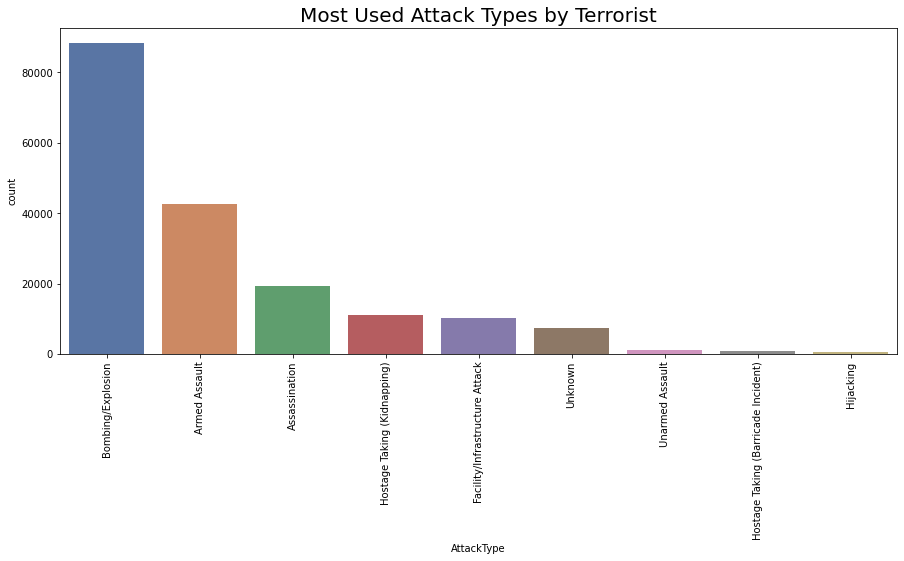

In [35]:
fig = plt.figure(figsize=(15,6))
sns.countplot('AttackType',data=df,order=df['AttackType'].value_counts().index,palette='deep')
plt.xticks(rotation=90)
plt.title("Most Used Attack Types by Terrorist", fontsize  = 20)
plt.show()


### Conclusion:
The above image shows the Most Used Attack Types by Terrorists.

The Most Used Attack Type by Terrorists is Bombing/Explosion.

The top 5 Attack Types used by Terrorists are Bombing/Explosion, Armed Assault, Assassination, Hostage Taking (Kidnapping), Facility/Infrastructure Attack.

### Most frequent target types of terrorists

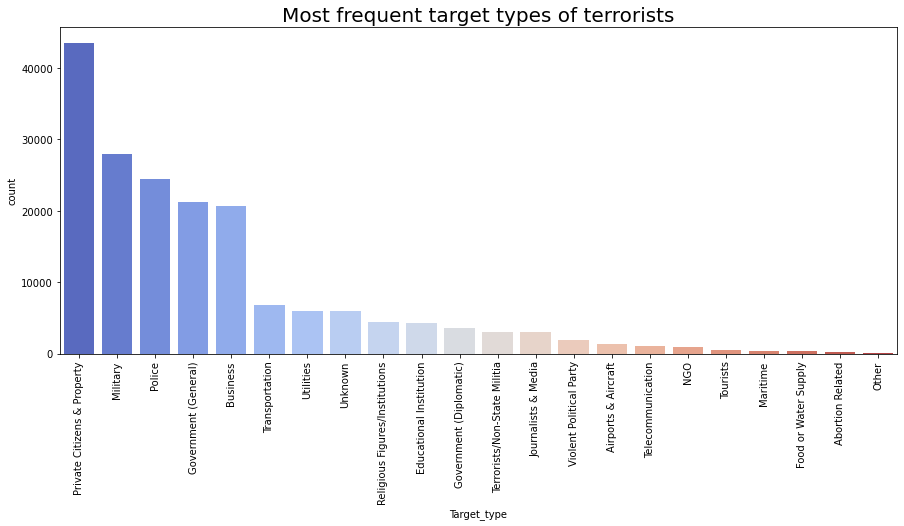

In [37]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Target_type',data=df,order=df['Target_type'].value_counts().index,palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Most frequent target types of terrorists", fontsize =  20)
plt.show()

### Conclusion:
The above image shows the Most frequent target types of terrorists.

The Most frequent target type of terrorists is Private Citizens & Property.

The top 5 Most frequent target type of terrorists are 'Private Citizens & Property', 'Military', 'Police', 'Government (General)', 'Business'.

### SUMMARY OF THE DATASET

In [38]:
print(f" There are a total of {df.shape[0]} terrorist attacks in the range of {df['Year'].min()} - {df['Year'].max()}. {len(df['Country'].unique())} Countries were affected during the time span. \n There were {df['Total_casualities'].sum()} casualities in Total. Out of which {df['Killed'].sum()} were Killed and {df['Wounded'].sum()} were Injured.")

 There are a total of 181691 terrorist attacks in the range of 1970 - 2017. 205 Countries were affected during the time span. 
 There were 872892.0 casualities in Total. Out of which 411868.0 were Killed and 523869.0 were Injured.


### FINAL OUTCOMES

1.The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.

2.The country which is most affected by terrorist attacks is Iraq.

3.The peak in terms of Number of Terrorists Attacks was observed in 2014.

4.The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.

5.The most affected Country by Total Casualities is Iraq with 200K+ Casualities.

6.The most affected State by Terrorist Attacks is Baghdadm with 7500+ Terrorist Attacks.

7.The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.

8.The Most Used Attack Type by Terrorists is Bombing/Explosion.

9.The Most frequent target type of terrorists is Private Citizens & Property.